## Student Information
Name: 張子凡

Student ID: 112139503

GitHub ID: spikey09

---

## Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

## Second PART

### 2.Data Preparation

In [136]:
# obtain the documents containing the categories providied
import pandas as pd
Data_raw = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
categories = Data_raw.sentiment.unique()
print('Data example\n {}'.format(Data_raw[:10]))
print('Data shape {}'.format(Data_raw.shape))
print('Data categories  = {}'.format(categories))

Data example
        sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
5      nostalgia  Every time I heard this song as a child, I use...
6      nostalgia  My dad loved listening to Jim Reeves, when I w...
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...
8  not nostalgia           Wherever you  are you always in my heart
9  not nostalgia  Elvis will always be number one no one can com...
Data shape (1500, 2)
Data categories  = ['not nostalgia' 'nostalgia']


In [137]:
#  print out the text data for the first three samples in the dataset
for i,text in enumerate(Data_raw.comment[:3]):
    print('Comment {}\n {}'.format(i,text))

Comment 0
 He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
Comment 1
 The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
Comment 2
 I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


### 3.Data Transformation

#### 3.1 Converting Dictionary into Pandas dataframe

In [138]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
Data = pd.DataFrame.from_records(dmh.format_rows_modified(Data_raw), columns= ['comment'])

##### Adding sentiment_num column

In [139]:
Data['sentiment'] = Data_raw['sentiment']
Data['sentiment_num'], sentiment_mapping = pd.factorize(Data['sentiment'])
print(Data)
print(sentiment_mapping)

                                                comment      sentiment  \
0     He was a singer with a golden voice that I lov...  not nostalgia   
1     The mist beautiful voice ever I listened to hi...      nostalgia   
2     I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3     30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4     listening to his songs reminds me of my mum wh...      nostalgia   
...                                                 ...            ...   
1495  i don't know!..but the opening of the video,.....  not nostalgia   
1496  it's sad this is such a beautiful song when yo...  not nostalgia   
1497  Dear Friend, I think age and time is not that ...  not nostalgia   
1498  I was born in 1954 and started to be aware of ...      nostalgia   
1499  This is the first CD I bought after my marriag...      nostalgia   

      sentiment_num  
0                 0  
1                 1  
2                 1  
3                 0  
4

### 4.Data Mining using Pandas

#### 4.1 Dealing with Missing Values

In [140]:
# calculate the missing values in each column.
import helpers.data_mining_helpers as dmh
Data.isnull().apply(lambda x: dmh.check_missing_values(x))

,comment,sentiment,sentiment_num
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [141]:
# calculate the missing values in each row.
import helpers.data_mining_helpers as dmh
Data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

#### 4.2 Dealing with Duplicate Data

In [142]:
# check per records whether there is duplicated data 
print(f'Number of duplicated data {sum(Data.duplicated())}')
print(f'Duplicated Data\n{Data[Data.duplicated()]}')
Data.drop_duplicates(inplace=True)
print(f'After drop duplicated data {sum(Data.duplicated())}')

Number of duplicated data 1
Duplicated Data
                                              comment      sentiment  \
78  never heard this song before... WOW What an am...  not nostalgia   

    sentiment_num  
78              0  
After drop duplicated data 0


In [143]:
# check 'comment' columns whether there is duplicated data 
print('Number of duplicated data in comment column {}'.format(sum(Data.duplicated('comment'))))

Number of duplicated data in comment column 0


### 5.Data Preprocessing

#### 5.1 Sampling

In [144]:
# Data sample
Data_sample = Data.sample(n=1000, random_state=42) 
print('Data num = {}'.format(len(Data)))
print('Data_sample num = {}'.format(len(Data_sample)))

Data num = 1499
Data_sample num = 1000


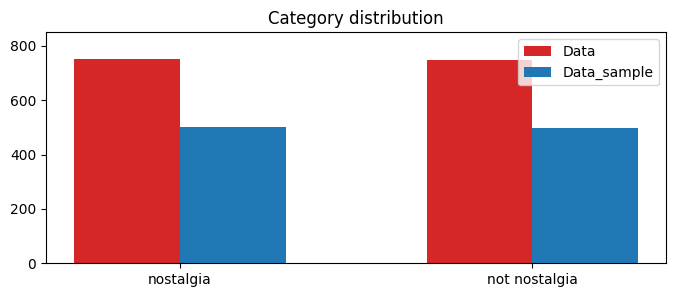

In [145]:
# Category distribution between original data and sample data
import matplotlib.pyplot as plt
import numpy as np
width = 0.3
upper_bound = max(max(Data.sentiment.value_counts()), max(Data_sample.sentiment.value_counts()))+100
x_coordinate = Data.sentiment.value_counts().index
plt.figure(figsize=(8,3))
plt.title('Category distribution') 
plt.bar(np.arange(len(x_coordinate))-width/2, Data.sentiment.value_counts(), color='tab:red',label='Data', width=width)
plt.bar(np.arange(len(x_coordinate))+width/2, Data_sample.sentiment.value_counts(), color='tab:blue', label='Data_sample', width=width)
plt.xticks(np.arange(len(x_coordinate)), labels=x_coordinate) 
plt.ylim(0, upper_bound) 
plt.legend(loc='upper right')
plt.show()

#### 5.2 Feature Creation

In [146]:
import nltk
import helpers.data_mining_helpers as dmh
nltk.download('punkt_tab')
# word tokenization
Data['unigrams'] = Data['comment'].apply(lambda x: dmh.tokenize_text(x))
print(Data[0:4])
print(list(Data[0:1]['unigrams']))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                             comment      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   

   sentiment_num                                           unigrams  
0              0  [He, was, a, singer, with, a, golden, voice, t...  
1              1  [The, mist, beautiful, voice, ever, I, listene...  
2              1  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3              0  [30, day, leave, from, 1st, tour, in, Viet, Na...  
[['He', 'was', 'a', 'singer', 'with', 'a', 'golden', 'voice', 'that', 'I', 'love', 'to', 'hear', 'all', 'the', 'time', '.', 'I', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', '.', 'Although', 'we', 'have', 'many', 'singers', 'n

#### 5.3 Feature Subset Selection

In [147]:
from sklearn.feature_extraction.text import CountVectorizer

# build document-term matrix
count_vect = CountVectorizer()
Data_counts = count_vect.fit_transform(Data.comment) 
print(Data_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


'\nThe top 20 most frequent words from the first document are selected, \nand a heatmap is generated to display their occurrences across the first 20 documents. \nThis visualizes whether the frequently appearing words in the first document are also common in the other documents.\n'

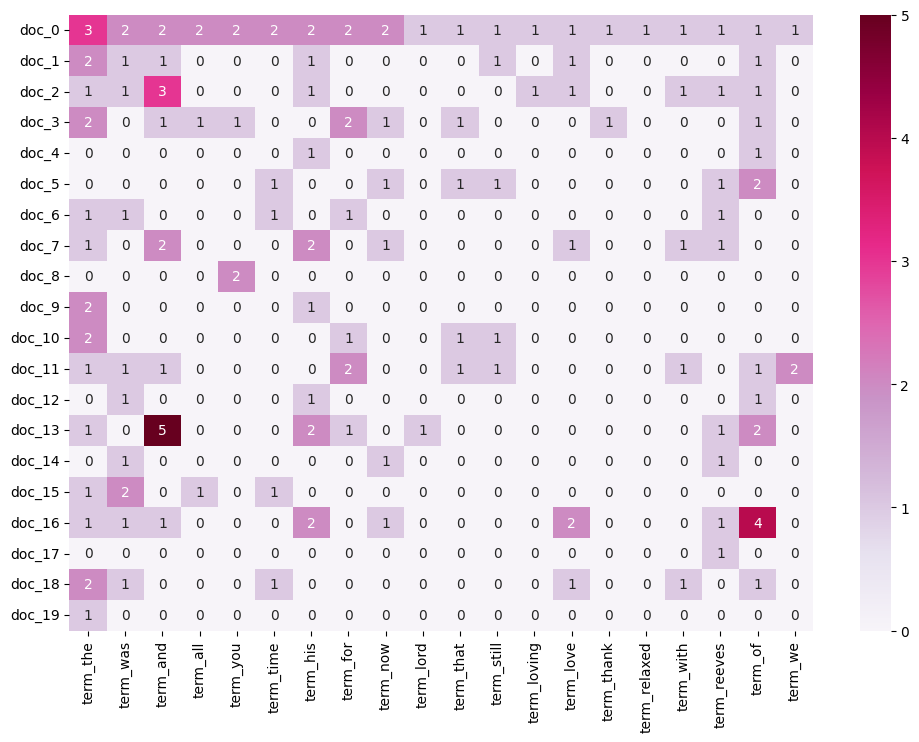

In [148]:
# Featuring: heatmap

import seaborn as sns

doc_0_vector = Data_counts[0].toarray().flatten()  
doc_0_terms = count_vect.get_feature_names_out()
top_20_indices = np.argsort(doc_0_vector)[-20:][::-1]  

top_20_x = ["term_"+str(i) for i in doc_0_terms[top_20_indices]] 
top_20_y = ["doc_"+ str(i) for i in list(Data.index)[0:20]]
top_20_z = Data_counts[0:20, top_20_indices].toarray()

df_todraw = pd.DataFrame(top_20_z, columns = top_20_x, index = top_20_y)
plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

'''
The top 20 most frequent words from the first document are selected, 
and a heatmap is generated to display their occurrences across the first 20 documents. 
This visualizes whether the frequently appearing words in the first document are also common in the other documents.
'''

#### 5.4 Atrribute Transformation / Aggregation

In [149]:
term_frequencies = np.array(Data_counts.sum(axis=0)).flatten()
terms_with_frequencies = list(zip(count_vect.get_feature_names_out(), term_frequencies))

top_50_terms = sorted(terms_with_frequencies, key=lambda x: x[1], reverse=True)[:50]
#print(top_50_terms)
top_50_terms, top_50_terms_frequencies = zip(*top_50_terms)

df = pd.DataFrame({'Terms': top_50_terms, 'Frequency': top_50_terms_frequencies})
fig = px.bar(df, x='Terms', y='Frequency')

fig.update_layout(
    width=1000,  
    height=400, 
    xaxis_tickangle=-90,  
    title='Term Frequencies for the First 50 Terms',
    font=dict(size=10)
)
# fig.show()
# HTML(fig.to_html())

'''
The top 50 terms with the highest frequency across all documents were selected for visualization, 
enabling an overview of the most common terms present in the dataset.
'''

'\nThe top 50 terms with the highest frequency across all documents were selected for visualization, \nenabling an overview of the most common terms present in the dataset.\n'

(0.0, 1351.0)

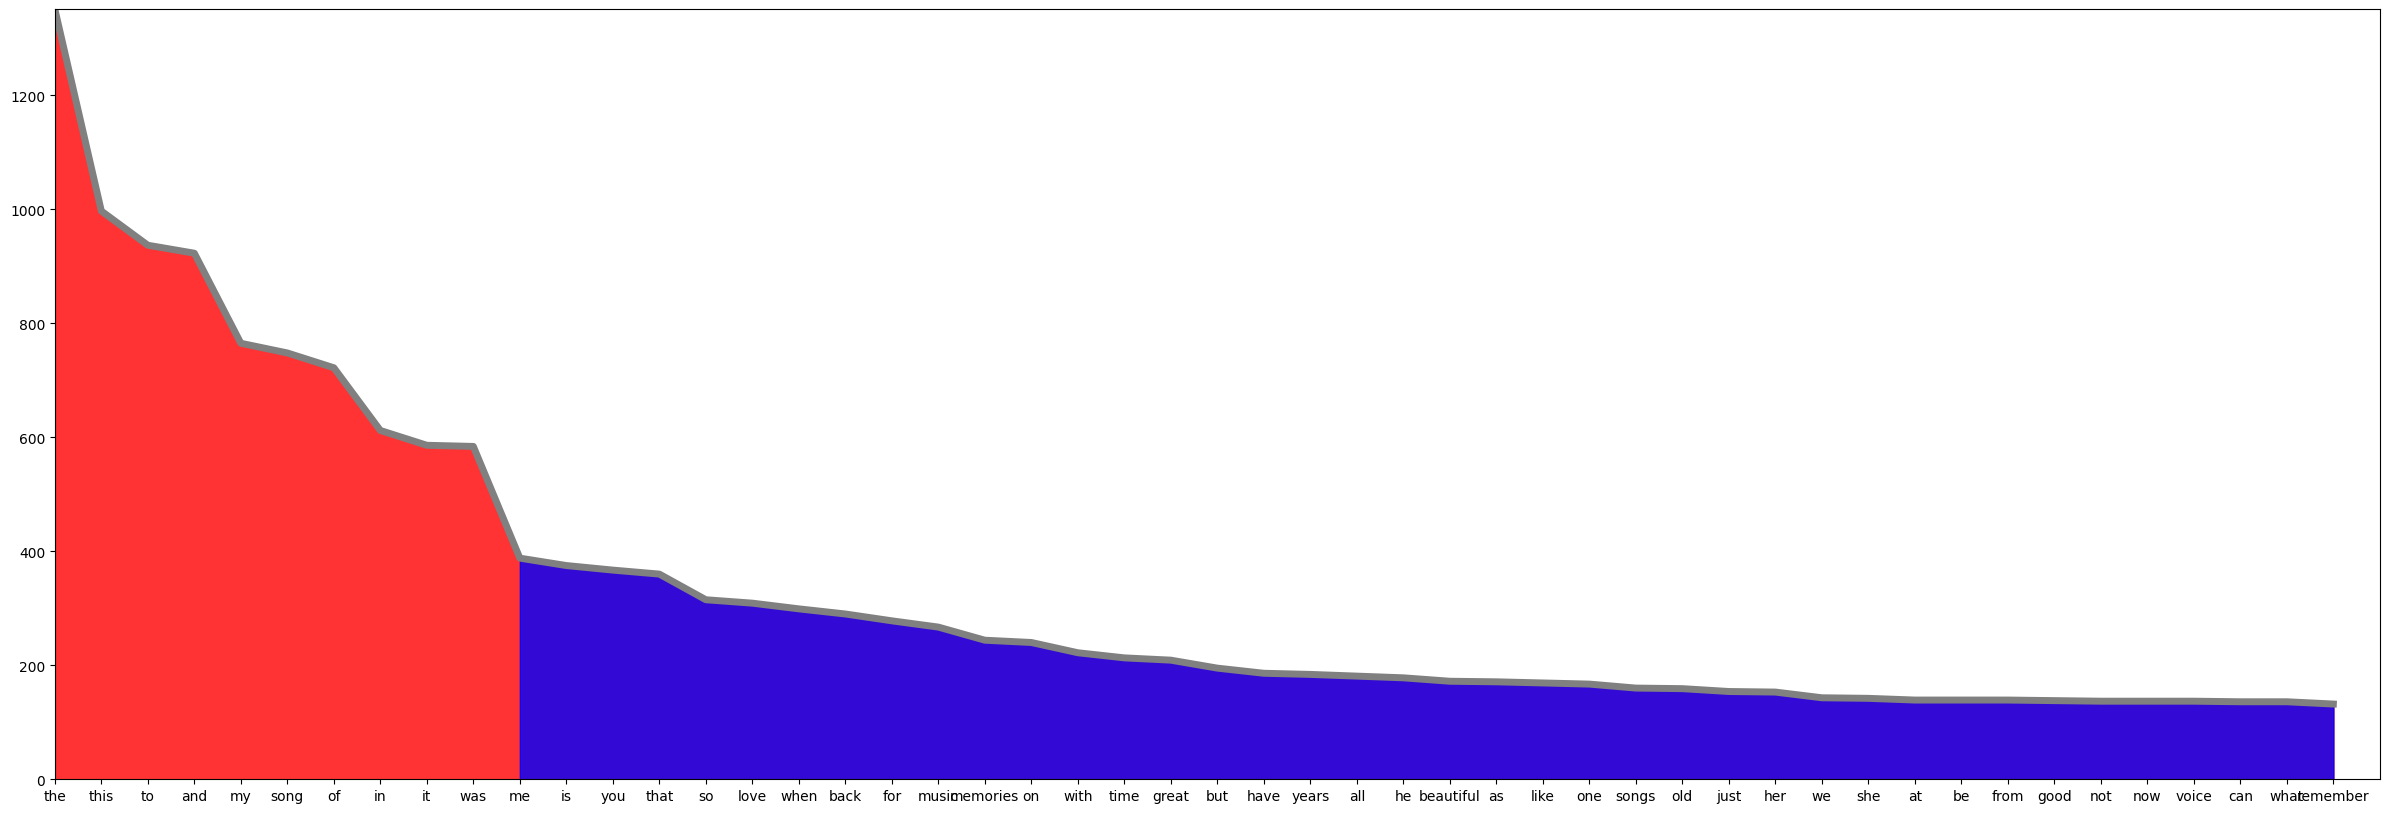

In [150]:
# Terms frequency visualization

term_frequencies = np.array(Data_counts.sum(axis=0)).flatten()
terms_with_frequencies = list(zip(count_vect.get_feature_names_out(), term_frequencies))

top_50_terms = sorted(terms_with_frequencies, key=lambda x: x[1], reverse=True)[:50]
top_50_terms, top_50_terms_frequencies = zip(*top_50_terms)

import matplotlib.pyplot as plt

df = pd.DataFrame({'Terms': top_50_terms, 'Frequency': top_50_terms_frequencies})
plt.figure(figsize=(30, 10))
plt.plot(df['Terms'], df['Frequency'], color='gray', lw=5)

threshold = np.max(df['Frequency']) * 0.3
plt.fill_between(range(df.shape[0]), df['Frequency'], color='red', alpha = 0.8, where=(df['Frequency'] >= threshold) + 1) # +1 means fill the gap
plt.fill_between(range(df.shape[0]), df['Frequency'], color='blue', alpha = 0.8, where=(df['Frequency'] < threshold))
plt.xlim(0, df.shape[0])
plt.ylim(0, max(df['Frequency']))

In [151]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = Data['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = Data[Data['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    Data_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(Data_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [152]:
# Display the filtered DataFrame for each categories
category_number=0 
for category_number in range(len(categories)):
    print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
    print(filt_term_document_dfs[categories[category_number]])

Filtered Term-Document Frequency DataFrame for Category not nostalgia:
     00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0         

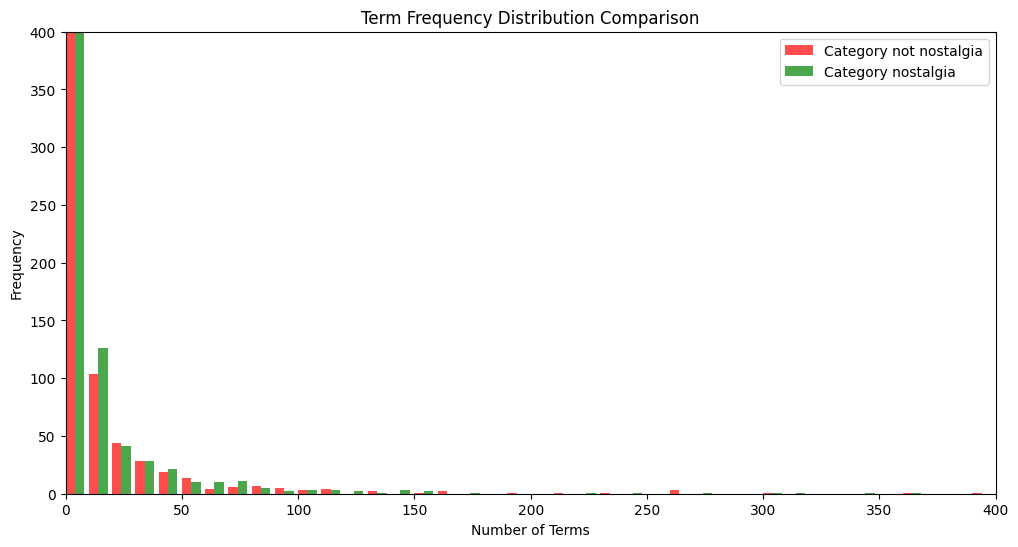

In [153]:
 # Sum over all documents to get total frequency for each word and visualize the frequency distribution
import numpy as np
import matplotlib.pyplot as plt

y_upperbound = 400
category1_counts = filt_term_document_dfs[categories[0]].sum(axis=0).to_numpy()
category2_counts = filt_term_document_dfs[categories[1]].sum(axis=0).to_numpy()

interval = 10 # 將TF資料分割別為區段做Max
bins = np.arange(0, 401, interval)
bar_width = 4  
category1_hist, _ = np.histogram(category1_counts, bins=bins) # 計算每個區間內的TF
category2_hist, _ = np.histogram(category2_counts, bins=bins)
x = bins[:-1] + bar_width  # 每個區間的起點加一點偏移量


plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, category1_hist, width=bar_width, color='red', alpha=0.7, label=f'Category {categories[0]}')
plt.bar(x + bar_width / 2, category2_hist, width=bar_width, color='green', alpha=0.7, label=f'Category {categories[1]}')

plt.title('Term Frequency Distribution Comparison')
plt.xlabel('Number of Terms')
plt.ylabel('Frequency')
plt.xlim(0, 400)
plt.ylim(0, y_upperbound)
plt.legend(loc='upper right')
plt.show()


In [154]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
for category_number in range(len(categories)):
    print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
    print(term_document_dfs[categories[category_number]])


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5.0% words: 
first       23
got         23
amazing     23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1
2

In [155]:
# Answer here

# Filter the bottom 5% and top 5% words based on their sum across all documents
def top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.05):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 5%
    top_n_data = sorted_words.tail(top_n)
    bottom_n_data = sorted_words.head(bottom_n)
    return top_n_data, bottom_n_data

# Apply the filtering function to each category
top_n_dfs = {}
bottom_n_dfs = {}

for category in categories:
    top_n_dfs[category],bottom_n_dfs[category] = top_bottom_words_by_sum(filt_term_document_dfs[category])

top_n_common_index = top_n_dfs[categories[0]].index.intersection(top_n_dfs[categories[1]].index)
print(f'The number of words that appear in the top 5% for all categories. {len(top_n_common_index)}')
bottom_n_common_index = bottom_n_dfs[categories[0]].index.intersection(bottom_n_dfs[categories[1]].index)
print(f'The number of words that appear in the bottom 5% for all categories. {len(bottom_n_common_index)}')

'''
The top 5% and bottom 5% of words across all categories were filtered. 
The overlap between these two groups was analyzed, revealing that many words in the top 5% appeared repeatedly across multiple categories. 
In contrast, no words from the bottom 5% were found in more than one category, indicating that low-frequency words tend to be unique to their respective categories.
'''

The number of words that appear in the top 5% for all categories. 83
The number of words that appear in the bottom 5% for all categories. 9


'\nThe top 5% and bottom 5% of words across all categories were filtered. \nThe overlap between these two groups was analyzed, revealing that many words in the top 5% appeared repeatedly across multiple categories. \nIn contrast, no words from the bottom 5% were found in more than one category, indicating that low-frequency words tend to be unique to their respective categories.\n'

In [156]:
#from PAMI.extras.DF2DB import DenseFormatDF as db  
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in categories:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

category: nostalgia
Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


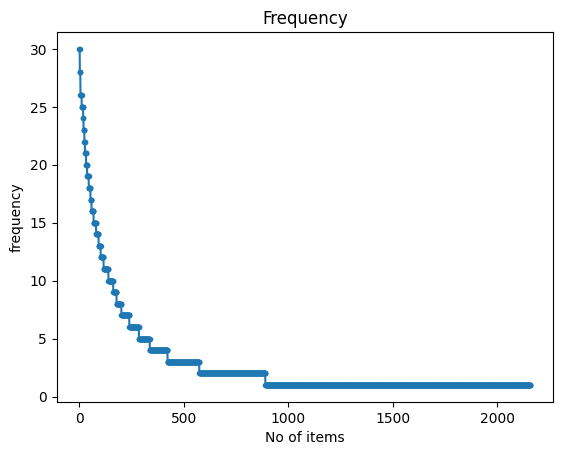

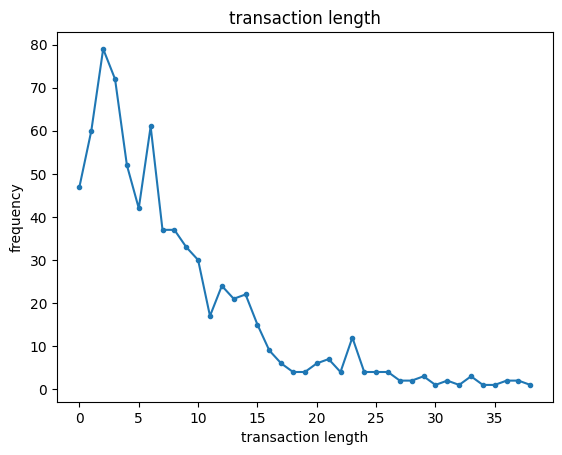

In [157]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
print('category: nostalgia')
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

category: not nostalgia
Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.399463806970509
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.940834266064001
Variance in Transaction Sizes : 35.3408856181514
Sparsity : 0.9965660409619908


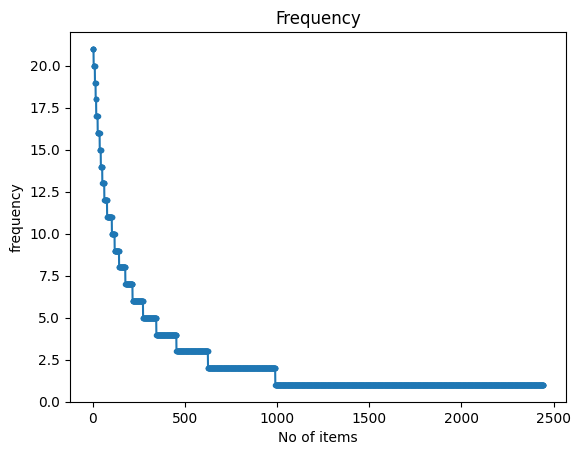

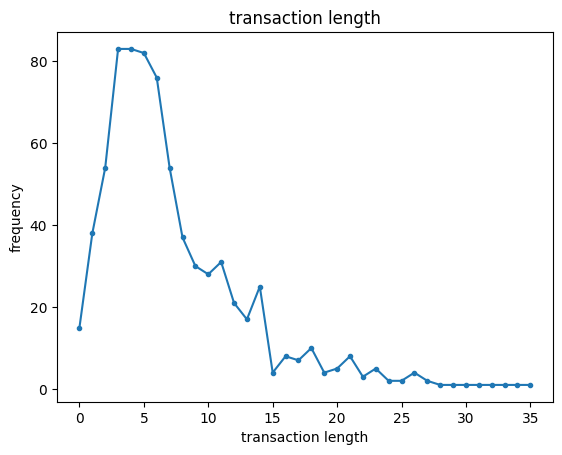

In [158]:
print('category: not nostalgia')
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [159]:
# Apply FPGrowth for nostalgia category
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia = obj1.getPatternsAsDataFrame()
print('Category : nostalgia')
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Category : nostalgia
Total No of patterns: 180
Runtime: 0.009973287582397461


,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,go,28
178,takes,30


Frequent Pattern Growth

In [160]:
# Apply FPGrowth for not nostalgia category
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia = obj2.getPatternsAsDataFrame()
print('Category : not nostalgia')
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Category : not nostalgia
Total No of patterns: 144
Runtime: 0.009973287582397461


,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,every,21
140,loved,21
141,classic,21
142,them,21


In [161]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
127    takes       30
125     ever       28
126    would       28
123       or       26
120      kid       26
..       ...      ...
135   others        9
136     pure        9
137   please        9
138   though        9
139   wonder        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [162]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
Data_tdm = count_vect.fit_transform(Data['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
Data['tokenized_text'] = Data['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=Data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = Data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(Data_tdm.toarray(), columns=terms, index=Data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,almost,end,family,ones,things,others,pure,please,though,wonder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [163]:
# Answer Here

from PAMI.frequentPattern.topk.FAE import FAE
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth 

filenames = ['td_freq_db_nostalgia.csv','td_freq_db_not nostalgia.csv']
categories = ['nostalgia','not_nostalgia']
for i,filename in enumerate(filenames):
    print('Categories : {}'.format(categories[i]))
    k_parameters = [100, 200, 300]
    for k in k_parameters:
        print(f"\nFAE Top-K algorithm with k = {k}")
        obj = FAE(iFile=filename, k=k)
        obj.mine()
        patterns_df = obj.getPatternsAsDataFrame()
        print(f"Number of patterns: {patterns_df.shape[0]}")
        print(f'Runtime: {str(obj.getRuntime())}')
        obj.save(f'FAETopK_patterns_{categories[i]}_k{k}.txt')
        print(patterns_df)
    
    
    minsup_parameters = [3, 6, 9]
    for minsup in minsup_parameters:
        print(f"\nMaxFPGrowth algorithm with minSup = {minsup}")
        obj = MaxFPGrowth(iFile=filename, minSup=minsup)
        obj.mine()
        patterns_df = obj.getPatternsAsDataFrame()
        print(f"Number of patterns: {patterns_df.shape[0]}")
        print(f'Runtime: {str(obj.getRuntime())}')
        obj.save(f'MAXFP_patterns_{categories[i]}_minSup{minsup}.txt')
        print(patterns_df)

'''
1. FPGrowth algorithm extracts all possible sub-patterns, often leading to redundancy due to overlapping patterns.
2. MaxFPGrowth it identifies only the maximal patterns (those not contained within larger patterns), 
reducing redundancy compared to FPGrowth. However, it can be more computationally intensive and slower.
3. FAE Top-K method targets the top-K most significant patterns, offering control over the exact number of patterns extracted. 
Its runtime grows with higher values of K.
'''

Categories : nostalgia

FAE Top-K algorithm with k = 100
 TopK frequent patterns were successfully generated using FAE algorithm.
Number of patterns: 100
Runtime: 0.00698089599609375
    Patterns  Support
0      takes       30
1   favorite       30
2       ever       28
3      would       28
4         go       28
..       ...      ...
95     while       13
96      last       13
97        10       13
98      eyes       13
99    lyrics       13

[100 rows x 2 columns]

FAE Top-K algorithm with k = 200
 TopK frequent patterns were successfully generated using FAE algorithm.
Number of patterns: 200
Runtime: 0.012964963912963867
     Patterns  Support
0       takes       30
1    favorite       30
2        ever       28
3       would       28
4          go       28
..        ...      ...
195      mind        8
196   another        8
197    better        8
198        12        8
199     grade        8

[200 rows x 2 columns]

FAE Top-K algorithm with k = 300
 TopK frequent patterns were succe

'\n1. FPGrowth algorithm extracts all possible sub-patterns, often leading to redundancy due to overlapping patterns.\n2. MaxFPGrowth it identifies only the maximal patterns (those not contained within larger patterns), \nreducing redundancy compared to FPGrowth. However, it can be more computationally intensive and slower.\n3. FAE Top-K method targets the top-K most significant patterns, offering control over the exact number of patterns extracted. \nIts runtime grows with higher values of K.\n'

#### 5.5 Dimensionality Reduction

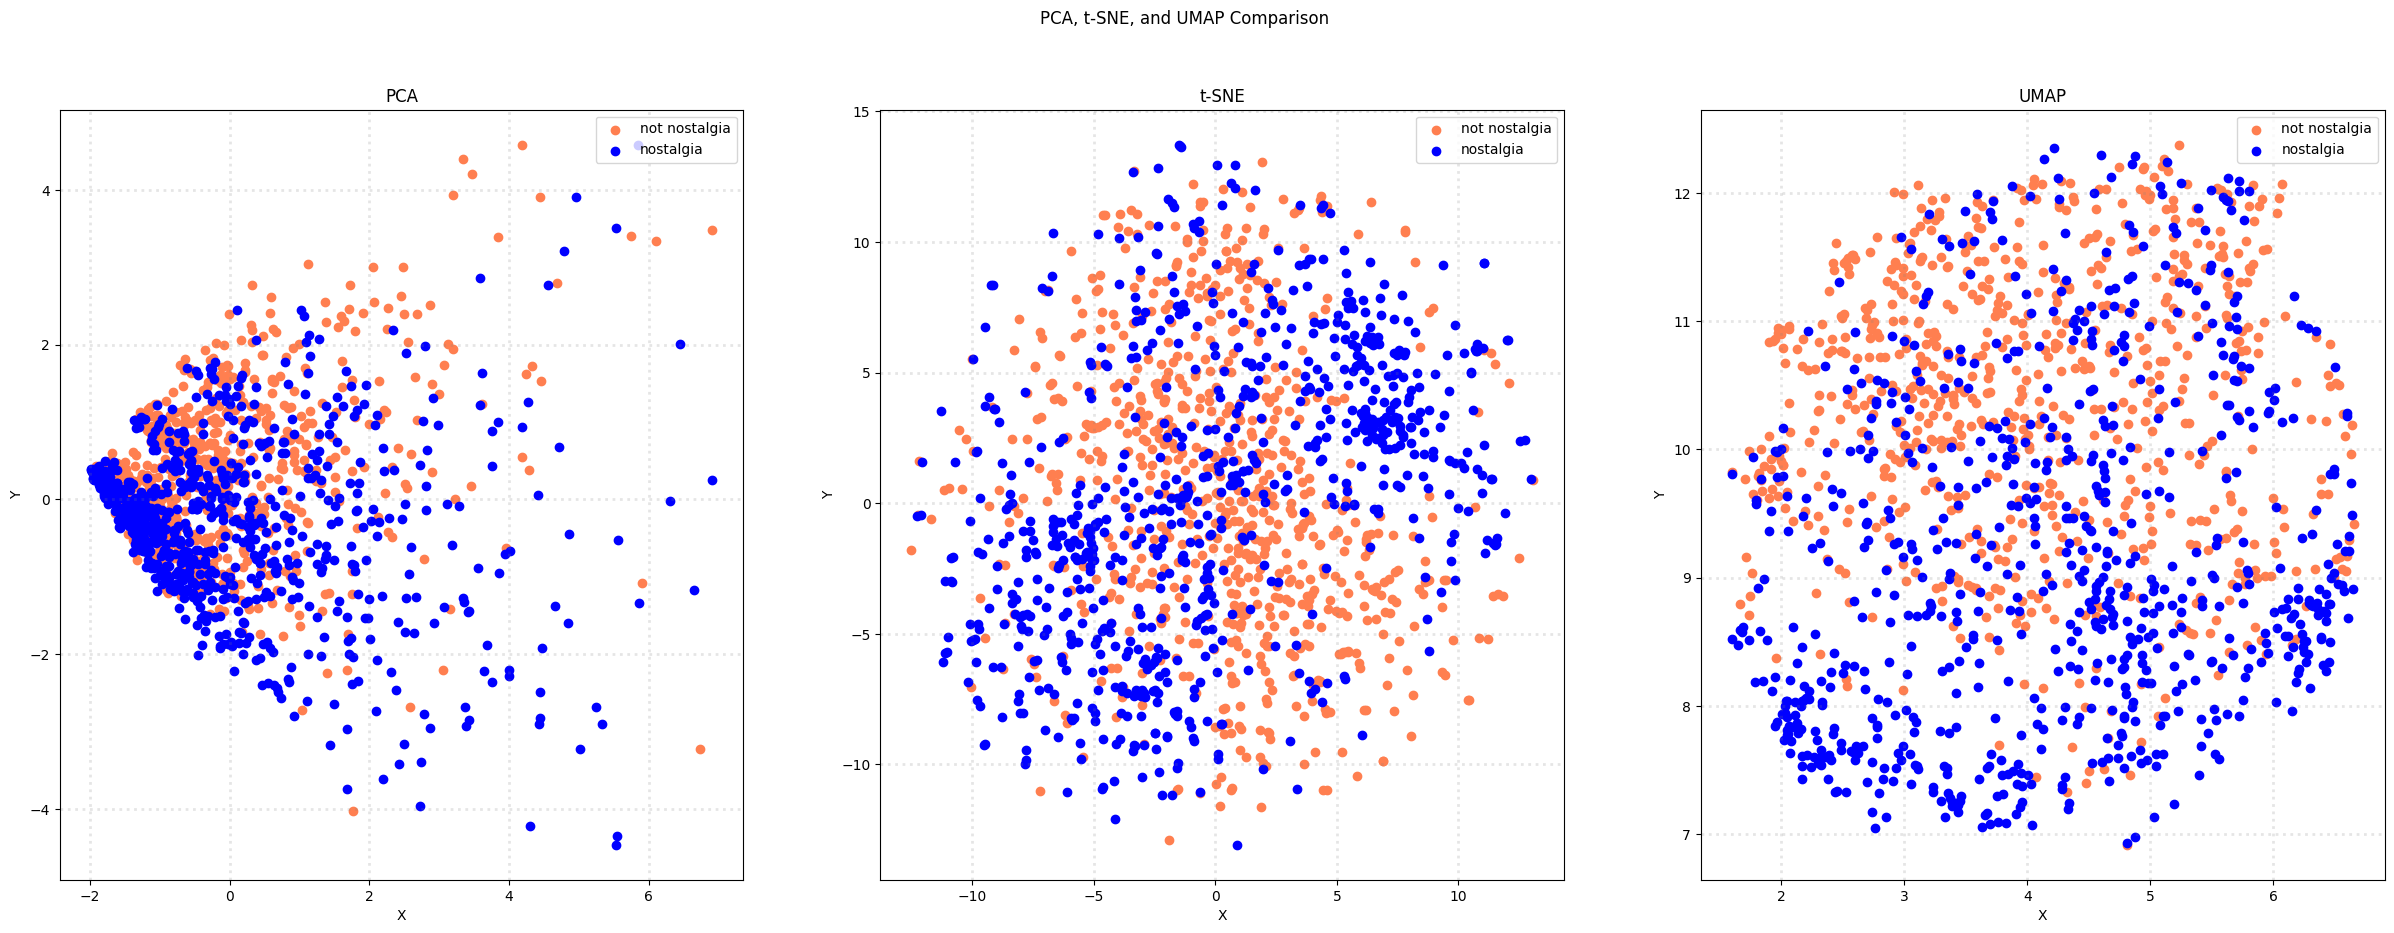

In [164]:
#Applying dimensionality reduction with only the augmented document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

Data_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
Data_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
Data_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = Data['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, Data_reduced, title):
    for c, category in zip(col, categories):
        xs = Data_reduced[Data['sentiment'] == category].T[0]
        ys = Data_reduced[Data['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], Data_pca_aug, 'PCA')
plot_scatter(axes[1], Data_tsne_aug, 't-SNE')
plot_scatter(axes[2], Data_umap_aug, 'UMAP')

plt.show()

'\nCompare the three techniques to understand how well each one preserves the structure of the original high-dimensional data\n'

<Figure size 3000x3000 with 0 Axes>

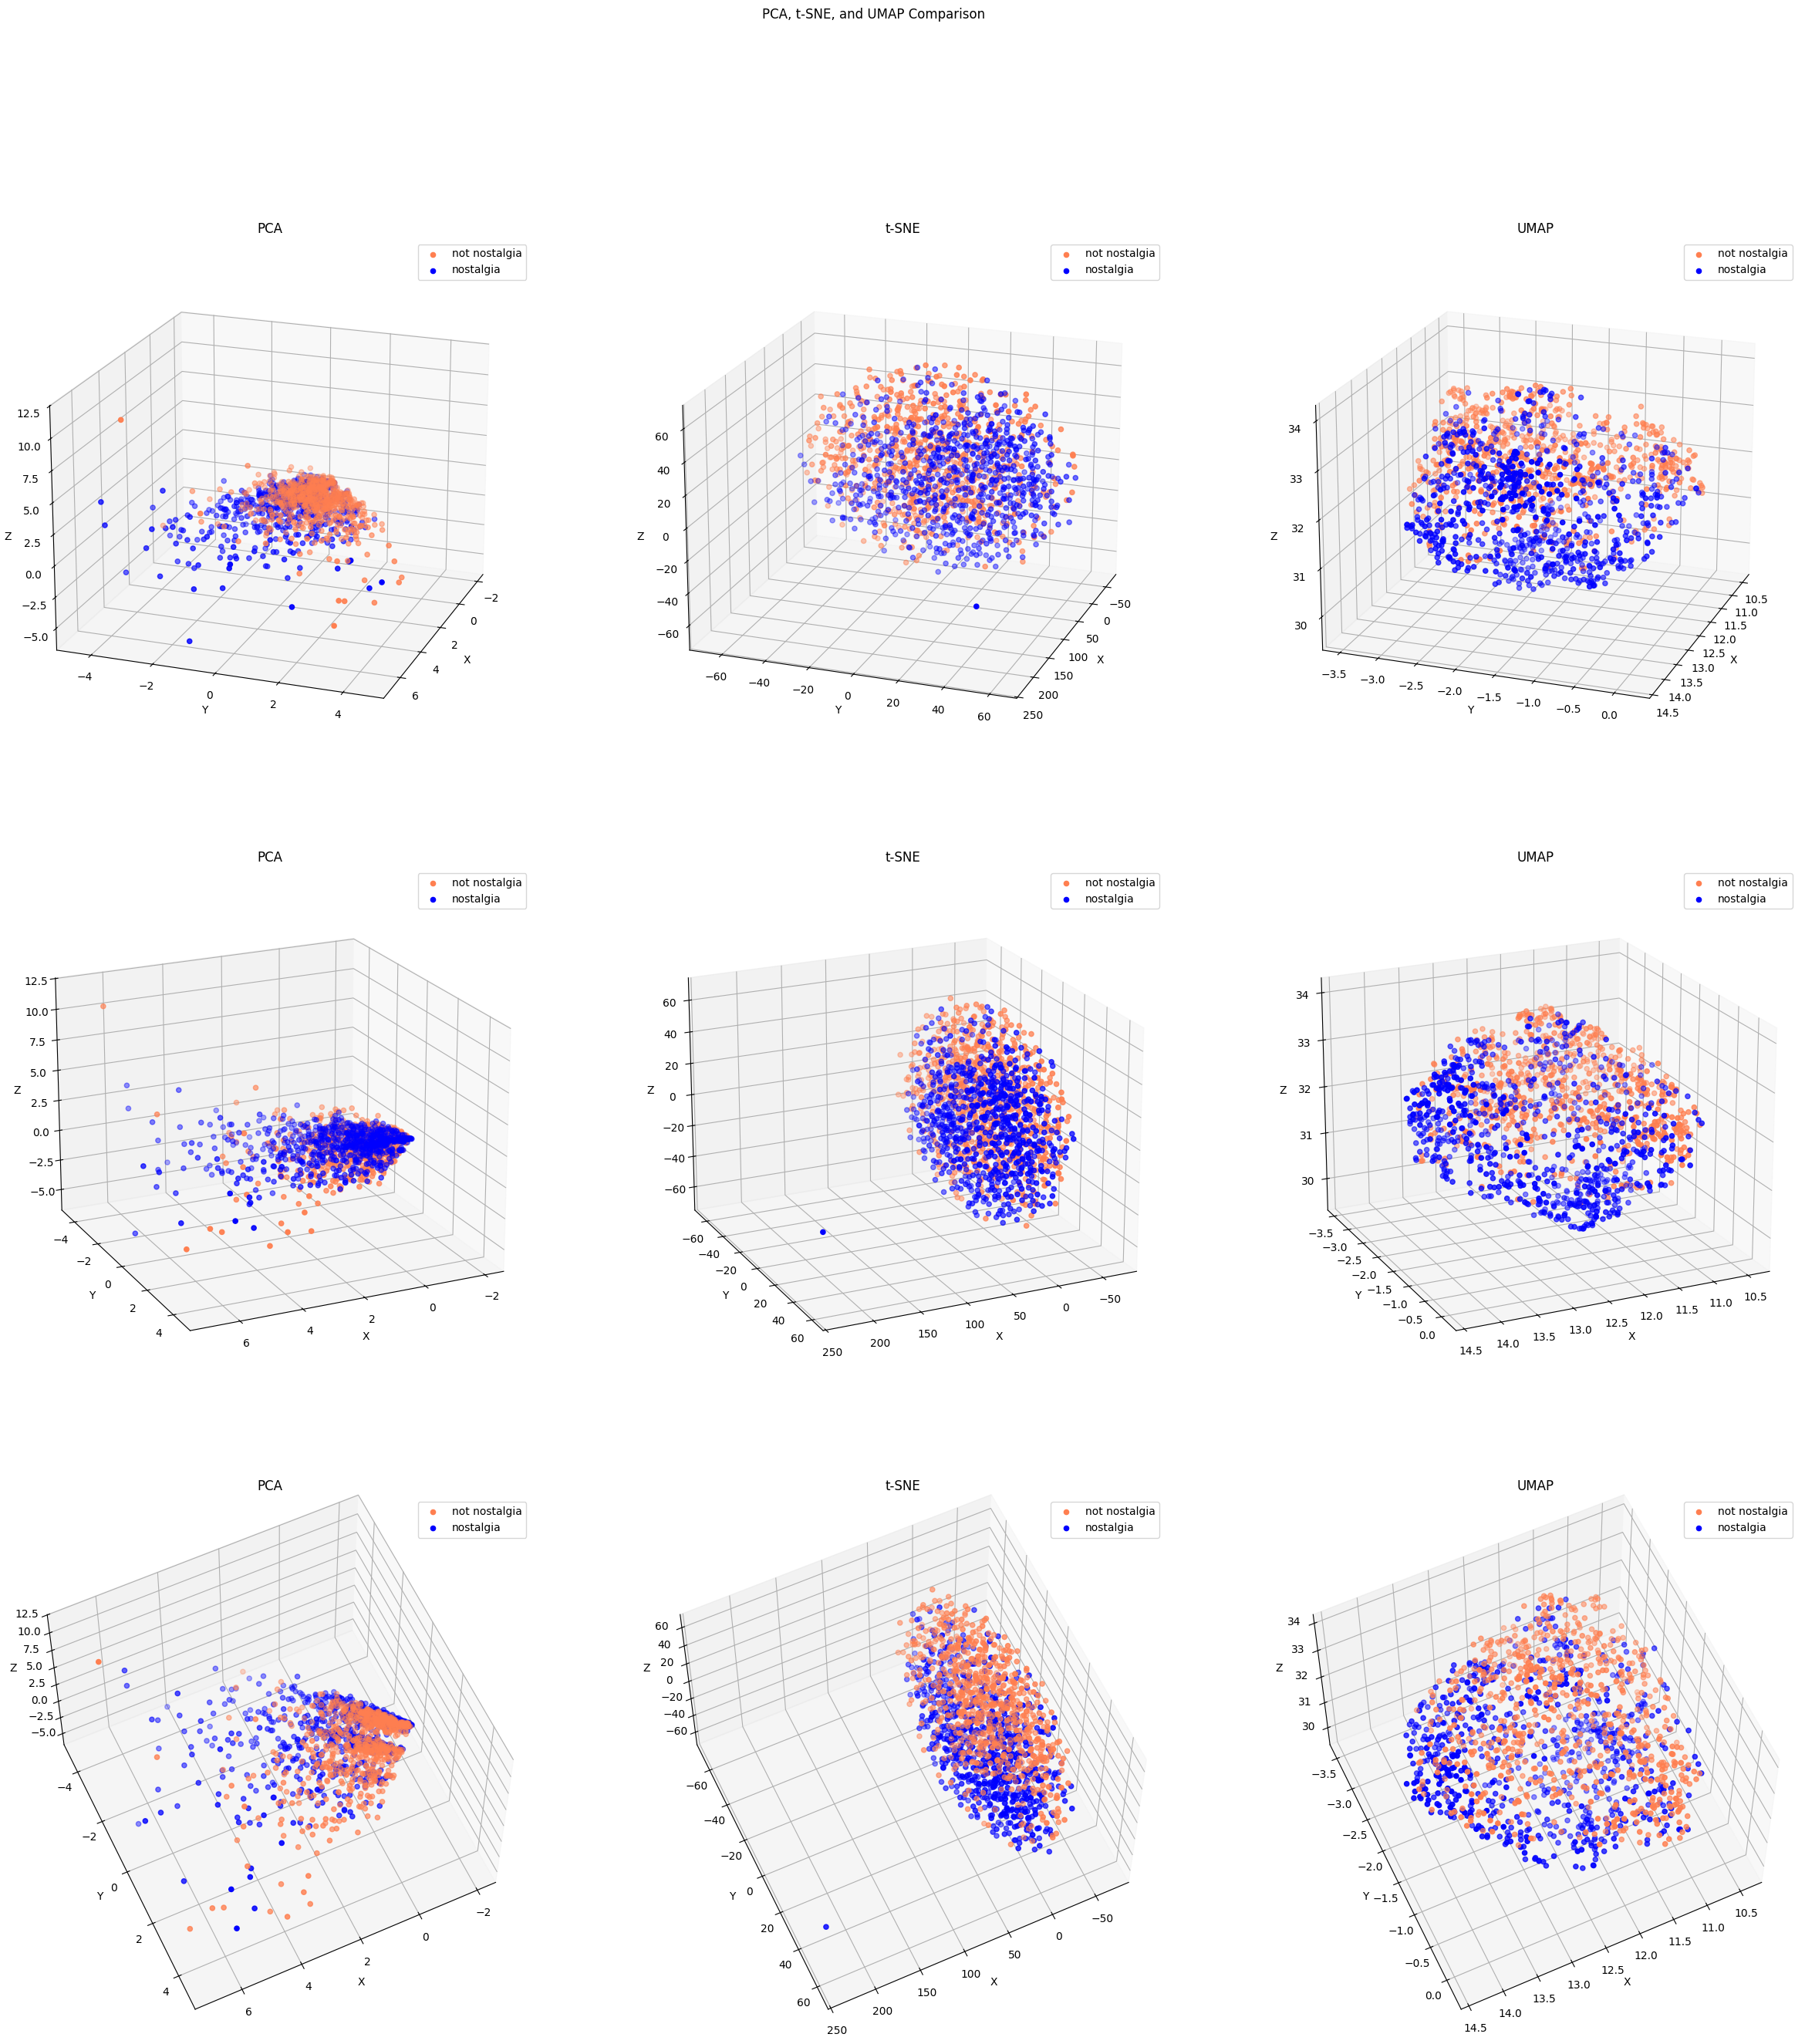

In [165]:
# Applying dimensionality reduction with only the augmented document-term frequency data 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np

Data_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
Data_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
Data_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = Data['sentiment'].unique() 

fig = plt.figure(figsize=(30, 30))
fig.suptitle('3D Scatter Plots PCA, t-SNE, and UMAP in different angles')

def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[Data['sentiment'] == category][:, 0]
        ys = X_reduced[Data['sentiment'] == category][:, 1]
        zs = X_reduced[Data['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

fig = plt.figure(figsize=(30, 30))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# 3D scatter plots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(331, projection='3d')
plot_3d_scatter(ax1, Data_pca_aug, 'PCA')

ax2 = fig.add_subplot(332, projection='3d')
plot_3d_scatter(ax2, Data_tsne_aug, 't-SNE')

ax3 = fig.add_subplot(333, projection='3d')
plot_3d_scatter(ax3, Data_umap_aug, 'UMAP')

ax4 = fig.add_subplot(334, projection='3d')
plot_3d_scatter(ax4, Data_pca_aug, 'PCA')

ax5 = fig.add_subplot(335, projection='3d')
plot_3d_scatter(ax5, Data_tsne_aug, 't-SNE')

ax6 = fig.add_subplot(336, projection='3d')
plot_3d_scatter(ax6, Data_umap_aug, 'UMAP')

ax7 = fig.add_subplot(337, projection='3d')
plot_3d_scatter(ax7, Data_pca_aug, 'PCA')

ax8 = fig.add_subplot(338, projection='3d')
plot_3d_scatter(ax8, Data_tsne_aug, 't-SNE')

ax9 = fig.add_subplot(339, projection='3d')
plot_3d_scatter(ax9, Data_umap_aug, 'UMAP')


# Set different viewing angles
ax1.view_init(elev=20, azim=20)  # PCA
ax2.view_init(elev=20, azim=20)  # t-SNE
ax3.view_init(elev=20, azim=20)  # UMAP
ax4.view_init(elev=20, azim=65)  # PCA
ax5.view_init(elev=20, azim=65)  # t-SNE
ax6.view_init(elev=20, azim=65)  # UMAP
ax7.view_init(elev=60, azim=65)  # PCA
ax8.view_init(elev=60, azim=65)  # t-SNE
ax9.view_init(elev=60, azim=65)  # UMAP

'''
Compare the three techniques to understand how well each one preserves the structure of the original high-dimensional data
'''

#### 5.6 Discretization and Binarization

In [166]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(Data.sentiment_num)
Data['bin_sentiment'] = mlb.transform(Data['sentiment_num']).tolist()
print(Data[0:9])
'''
Effectively binarizes the sentiment labels and integrates the result into the original dataset.
'''

                                             comment      sentiment  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   

   sentiment_num                                           unigrams  \
0              0  [He, was, a, singer, with, a, golden, voice, t...   
1              1  [The, mist, beautiful, voice, ever, I, listene...   
2              1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3    

'\nEffectively binarizes the sentiment labels and integrates the result into the original dataset.\n'

### 6. Data Exploration

In [167]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = Data.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Data.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Data.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)


# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())


from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print(f"Cosine Similarity using count bw 1 and 2: {cos_sim_count_1_2[0][0]:.6f}")
print(f"Cosine Similarity using count bw 1 and 3: {cos_sim_count_1_3[0][0]:.6f}")
print(f"Cosine Similarity using count bw 2 and 3: {cos_sim_count_2_3[0][0]:.6f}")

print(f"Cosine Similarity using count bw 1 and 1: {cos_sim_count_1_1[0][0]:.6f}")
print(f"Cosine Similarity using count bw 2 and 2: {cos_sim_count_2_2[0][0]:.6f}")
print(f"Cosine Similarity using count bw 3 and 3: {cos_sim_count_3_3[0][0]:.6f}")

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### 7. Data Classification

In [168]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(Data[['sentiment_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, Data['sentiment_num'], test_size=0.3, random_state=45)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9192    0.7679    0.8368       237
    nostalgia     0.7817    0.9249    0.8473       213

     accuracy                         0.8422       450
    macro avg     0.8505    0.8464    0.8420       450
 weighted avg     0.8541    0.8422    0.8418       450



In [169]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(Data[['sentiment_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, Data['sentiment_num'], test_size=0.3, random_state=45)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8533333333333334

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9212    0.7890    0.8500       237
    nostalgia     0.7976    0.9249    0.8565       213

     accuracy                         0.8533       450
    macro avg     0.8594    0.8570    0.8533       450
 weighted avg     0.8627    0.8533    0.8531       450



## Third PART

### **New Data Visualizations**

In [170]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

categories = Data['sentiment'].unique()  
category_dfs = {} 

for category in categories:
    category_dfs[category] = Data[Data['sentiment'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer() 
    Data_counts = count_vect.fit_transform(df['comment']) 
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(Data_counts.toarray(), columns=words)

    return term_document_df

filt_term_document_dfs = {}  

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [171]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') 
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')

    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}
categories = ['not nostalgia', 'nostalgia']

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
for category_number in range(len(categories)):
    print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
    print(term_document_dfs[categories[category_number]])


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5.0% words: 
first       23
got         23
amazing     23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1
2

Data Visualization

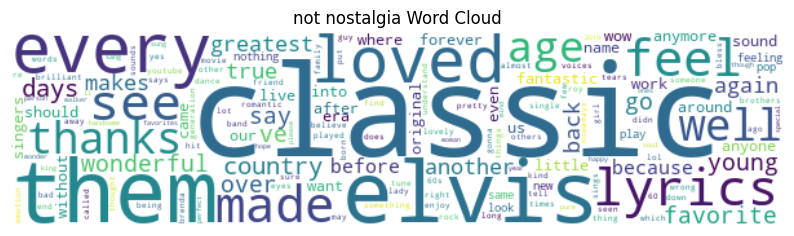

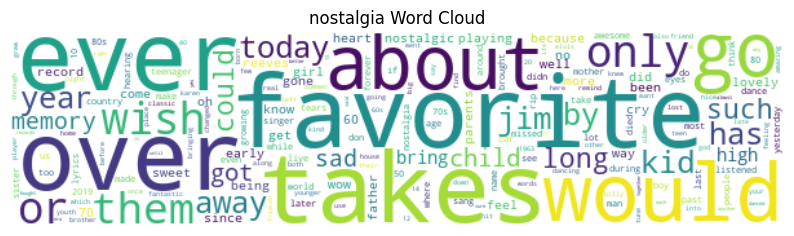

In [172]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for category in categories:
    word_sums = term_document_dfs[category].sum(axis=0)
    wordcloud = WordCloud(width=600, height=150, background_color='white').generate_from_frequencies(word_sums)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{category} Word Cloud")
    plt.show()

### **TF-IDF Features**

In [173]:
# Calculate TF-IDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import helpers.data_mining_helpers as dmh

Data_loaded = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
Data_modified = pd.DataFrame.from_records(dmh.format_rows_modified(Data_loaded), columns=['comment'])
Data_modified['sentiment'] = Data_raw['sentiment']
Data_modified['sentiment_num'] = Data_modified['sentiment'].apply(lambda t: dmh.format_labels_modified(t))
Data_modified.drop_duplicates(inplace=True)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(Data_modified['comment'])
feature_names = tfidf.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
df_tfidf

'''
data loading, preprocessing, and feature extraction using 
TF-IDF (Term Frequency-Inverse Document Frequency) on YouTube comments, 
aimed at preparing the data for sentiment analysis
code prepares the dataset by transforming text into features suitable for machine learning models, like those used in sentiment analysis
'''

'\ndata loading, preprocessing, and feature extraction using \nTF-IDF (Term Frequency-Inverse Document Frequency) on YouTube comments, \naimed at preparing the data for sentiment analysis\ncode prepares the dataset by transforming text into features suitable for machine learning models, like those used in sentiment analysis\n'

### **Naive Bayes classifier**

In [174]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

Data_loaded = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')
Data_modified = pd.DataFrame.from_records(dmh.format_rows_modified(Data_loaded), columns=['comment'])
Data_modified['sentiment'] = Data_loaded['sentiment']
Data_modified['sentiment_num'] = Data_modified['sentiment'].apply(lambda t: dmh.format_labels_modified(t))
Data_modified.drop_duplicates(inplace=True)

category_dict = {0: 'not nostalgia', 1: 'nostalgia'}
target_names = ['not nostalgia', 'nostalgia']
count_vectorizer = CountVectorizer()
Data_count = count_vectorizer.fit_transform(Data_modified['comment'])

Data_count_train, Data_count_test, y_train, y_test = train_test_split(Data_count, Data_modified['sentiment'], test_size=0.3, random_state=42)
Data_tfidf_train, Data_tfidf_test, y_train, y_test = train_test_split(df_tfidf, Data_modified['sentiment'], test_size=0.3, random_state=42)

bayes_count = MultinomialNB()
bayes_count.fit(Data_count_train, y_train)

bayes_tfidf = BernoulliNB()
bayes_tfidf.fit(Data_tfidf_train, y_train)

y_pred_count = bayes_count.predict(Data_count_test)
y_pred_tfidf = bayes_tfidf.predict(Data_tfidf_test)

print(">>Term Frequency Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print(">>TF-IDF Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))

print("\nTF Report:\n", classification_report(y_test, y_pred_count, target_names=target_names, digits=4))
print("\nTF-IDF Report:\n", classification_report(y_test, y_pred_tfidf, target_names=target_names, digits=4))

'''
Sentiment analysis different Naive Bayes classifiers with accuracy and classification reports.
'''

>>Term Frequency Naive Bayes
Accuracy: 0.8688888888888889
>>TF-IDF Naive Bayes
Accuracy: 0.8844444444444445

TF Report:
                precision    recall  f1-score   support

not nostalgia     0.8222    0.9528    0.8827       233
    nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450


TF-IDF Report:
                precision    recall  f1-score   support

not nostalgia     0.8521    0.9399    0.8939       233
    nostalgia     0.9275    0.8249    0.8732       217

     accuracy                         0.8844       450
    macro avg     0.8898    0.8824    0.8835       450
 weighted avg     0.8885    0.8844    0.8839       450



'\nSentiment analysis different Naive Bayes classifiers with accuracy and classification reports.\n'

## Fourth PART

In the YouTube comment dataset example, since there are only two categories (e.g., positive vs. negative), it is more efficient to use binary encoding (0 and 1) instead of One-Hot encoding, which would introduce redundant columns. Binary encoding keeps the data compact and speeds up processing, as only one column is needed to represent both categories. This approach is well-suited for binary classification models like Logistic Regression and SVM, which naturally handle 0/1 inputs, making it a simple and effective way to encode two-class data.



## Fifth PART

**tidy up your notebook** and **add minimal comments where needed**